In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
np.random.seed(0)

In [12]:
data_dir = os.path.join(os.getcwd(), 'data')
nodes_path = os.path.join(data_dir, 'nodes.csv')
nodes = pd.read_csv(nodes_path)
print(nodes)
N = len(nodes)
print(N)

   id area       lat       lon  exists comment
0   0   A1  0.053854  0.258873    True  Acivte
1   1   A1  3.311649  2.997394   False     NaN
2   2   A1  9.441865  2.706503    True  Acivte
3   3   A1  4.435083  3.941700   False     NaN
4   4   A1  9.600167  3.018355   False     NaN
5   5   A2  3.964494  5.547912    True  Acivte
6   6   A2  7.669562  6.032776   False     NaN
7   7   A2  9.090400  9.983468   False     NaN
8   8   A1  9.160617  1.262492   False     NaN
9   9   A2  5.784274  8.574254    True  Acivte
10


In [13]:
eucledian_distance = lambda x1, y1, x2, y2: np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [14]:
distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        distance_matrix[i][j] = eucledian_distance(nodes.loc[i, "lat"], nodes.loc[i, "lon"], nodes.loc[j, "lat"], nodes.loc[j, "lon"])

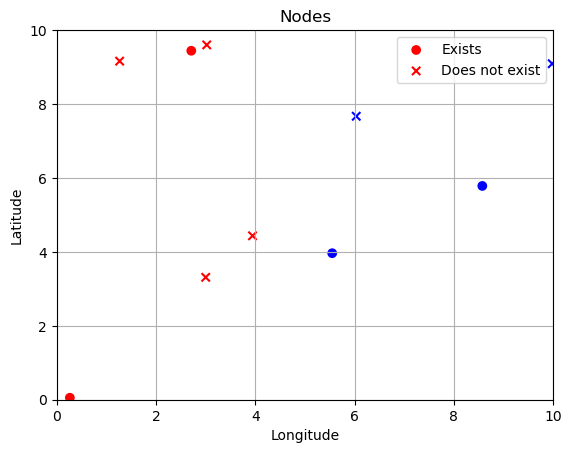

In [15]:
plt.figure()
area_to_color = {"A1": "red", "A2": "blue"}
colormap = np.array([area_to_color[area] for area in nodes["area"]])
plt.scatter(nodes[nodes["exists"]]["lon"], nodes[nodes["exists"]]["lat"], c=colormap[nodes["exists"]], marker="o", label="Exists")
plt.scatter(nodes[~nodes["exists"]]["lon"], nodes[~nodes["exists"]]["lat"], c=colormap[~nodes["exists"]], marker='x', label="Does not exist")
plt.title("Nodes")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.legend()
plt.show()